In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Load the CSV files into DataFrames
df_1 = pd.read_csv('https://raw.githubusercontent.com/apekshai101/Project_4/main/test.csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/apekshai101/Project_4/main/train.csv')
df_1.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [2]:
#Concatenate DataFrames
df = pd.concat([df_1, df_2], axis=0, ignore_index=True)
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
df.shape

(129880, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [5]:
# Check for any null values in the DataFrame
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes     

In [6]:
 # Remove rows with missing values
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
print(df.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [7]:
# Identify duplicates in dataframe
duplicates = df.duplicated()
duplicates_number = duplicates.sum()
duplicates_number

0

In [8]:
# Determine the number of unique values in each column.
unique_counts = df.nunique()
print(unique_counts)

Unnamed: 0                           103656
id                                   129487
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [9]:
# Preprocess: Drop columns not useful for prediction
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [10]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [11]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [12]:
# Define the numerical columns
numerical_columns = [
    'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

# Function to calculate number of outliers using IQR method
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Calculate and print number of outliers for each numerical column
outliers_count = {col: count_outliers(df[col]) for col in numerical_columns}

# Display the number of outliers in each column
for col, count in outliers_count.items():
    print(f'Number of outliers in {col}: {count}')


Number of outliers in Age: 0
Number of outliers in Flight Distance: 2847
Number of outliers in Inflight wifi service: 0
Number of outliers in Departure/Arrival time convenient: 0
Number of outliers in Ease of Online booking: 0
Number of outliers in Gate location: 0
Number of outliers in Food and drink: 0
Number of outliers in Online boarding: 0
Number of outliers in Seat comfort: 0
Number of outliers in Inflight entertainment: 0
Number of outliers in On-board service: 0
Number of outliers in Leg room service: 0
Number of outliers in Baggage handling: 0
Number of outliers in Checkin service: 16059
Number of outliers in Inflight service: 0
Number of outliers in Cleanliness: 0
Number of outliers in Departure Delay in Minutes: 17970
Number of outliers in Arrival Delay in Minutes: 17492


In [13]:
# List of columns to apply transformation
columns_to_transform = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Checkin service']

# Apply logarithmic transformation to each column
for column in columns_to_transform:
    df[column] = np.log1p(df[column])

# Verify transformation
print(df[columns_to_transform].describe())


       Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
count    129487.000000               129487.000000             129487.000000   
mean          6.706260                    1.231098                  1.263394   
std           0.915689                    1.615801                  1.629850   
min           3.465736                    0.000000                  0.000000   
25%           6.028279                    0.000000                  0.000000   
50%           6.739337                    0.000000                  0.000000   
75%           7.464510                    2.564949                  2.639057   
max           8.513988                    7.373374                  7.368340   

       Checkin service  
count    129487.000000  
mean          1.407874  
std           0.340709  
min           0.000000  
25%           1.386294  
50%           1.386294  
75%           1.609438  
max           1.791759  


In [14]:
# encode categorical variables
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=categorical_columns)
df.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,5.081404,5,4,3,4,3,4,3,5,...,satisfied,True,False,True,False,True,False,False,True,False
1,36,7.959975,1,1,3,1,5,4,5,4,...,satisfied,True,False,True,False,True,False,True,False,False
2,20,5.262690,2,0,2,4,2,2,2,2,...,neutral or dissatisfied,False,True,False,True,True,False,False,True,False
3,44,8.125039,0,0,0,2,3,4,4,1,...,satisfied,False,True,True,False,True,False,True,False,False
4,49,7.075809,2,3,4,3,4,1,2,2,...,satisfied,True,False,True,False,True,False,False,True,False


In [15]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

In [16]:
df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
df.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,5.081404,5,4,3,4,3,4,3,5,...,1,True,False,True,False,True,False,False,True,False
1,36,7.959975,1,1,3,1,5,4,5,4,...,1,True,False,True,False,True,False,True,False,False
2,20,5.262690,2,0,2,4,2,2,2,2,...,0,False,True,False,True,True,False,False,True,False
3,44,8.125039,0,0,0,2,3,4,4,1,...,1,False,True,True,False,True,False,True,False,False
4,49,7.075809,2,3,4,3,4,1,2,2,...,1,True,False,True,False,True,False,False,True,False


In [17]:
# Define Features and Target Variable
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [18]:

#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.preprocessing import MinMaxScaler
#Scale the Features
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# Capture start time
start_time = time.time()
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
# Capture end time
end_time = time.time()

# Calculate training time
xgb_training_time = end_time - start_time

xgb_y_pred = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, xgb_y_pred)
report_xgb = classification_report(y_test, xgb_y_pred)


print("XGBoost Classifier")
print(f"Accuracy: {accuracy_xgb}")
print(f"Classification Report:\n{report_xgb}\n")
print(f"Training Time: {xgb_training_time:.2f} seconds")


XGBoost Classifier
Accuracy: 0.9640512780909722
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14456
           1       0.97      0.95      0.96     11442

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898


Training Time: 6.72 seconds


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator for prediction
best_model1 = grid_search.best_estimator_
xgb_y_pred_tuned = best_model1.predict(X_test)
accuracy_xgb_tuned = accuracy_score(y_test, xgb_y_pred_tuned)
report_xgb_tuned = classification_report(y_test, xgb_y_pred_tuned)

print("Tuned XGBoost Classifier")
print(f"Accuracy: {accuracy_xgb_tuned}")
print(f"Classification Report:\n{report_xgb_tuned}\n")


Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}
Best Score: 0.9640502508666955
Tuned XGBoost Classifier
Accuracy: 0.9652096687002857
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14456
           1       0.98      0.94      0.96     11442

    accuracy                           0.97     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.97      0.97      0.97     25898




In [23]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 9],
    'learning_rate': [0.01, 0.05],
    'gamma': [0, 0.1],
}
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator for prediction
best_model = grid_search.best_estimator_
xgb_y_pred_tuned = best_model.predict(X_test)
accuracy_xgb_tuned = accuracy_score(y_test, xgb_y_pred_tuned)
report_xgb_tuned = classification_report(y_test, xgb_y_pred_tuned)

print("Tuned XGBoost Classifier")
print(f"Accuracy: {accuracy_xgb_tuned}")
print(f"Classification Report:\n{report_xgb_tuned}\n")


Best Parameters: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 200}
Best Score: 0.9638378625736411
Tuned XGBoost Classifier
Accuracy: 0.9653255077612171
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14456
           1       0.98      0.95      0.96     11442

    accuracy                           0.97     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.97      0.97      0.97     25898




Sorted Feature Importances:
Online boarding: 0.42787858843803406
Type of Travel_Business travel: 0.153818741440773
Inflight wifi service: 0.11609023809432983
Class_Business: 0.052207108587026596
Customer Type_Loyal Customer: 0.045966681092977524
Inflight entertainment: 0.042772263288497925
Checkin service: 0.02409740723669529
Cleanliness: 0.017068222165107727
Gate location: 0.01672632247209549
On-board service: 0.014642233960330486
Seat comfort: 0.013873026706278324
Baggage handling: 0.01314393151551485
Leg room service: 0.012529570609331131
Inflight service: 0.011206036433577538
Ease of Online booking: 0.007445615716278553
Age: 0.006294186692684889
Departure/Arrival time convenient: 0.005306193605065346
Arrival Delay in Minutes: 0.004343944601714611
Class_Eco: 0.0031126542016863823
Food and drink: 0.0028586620464920998
Flight Distance: 0.002749505452811718
Departure Delay in Minutes: 0.0021846333984285593
Gender_Female: 0.0019298963015899062
Class_Eco Plus: 0.0017542665591463447
Gende

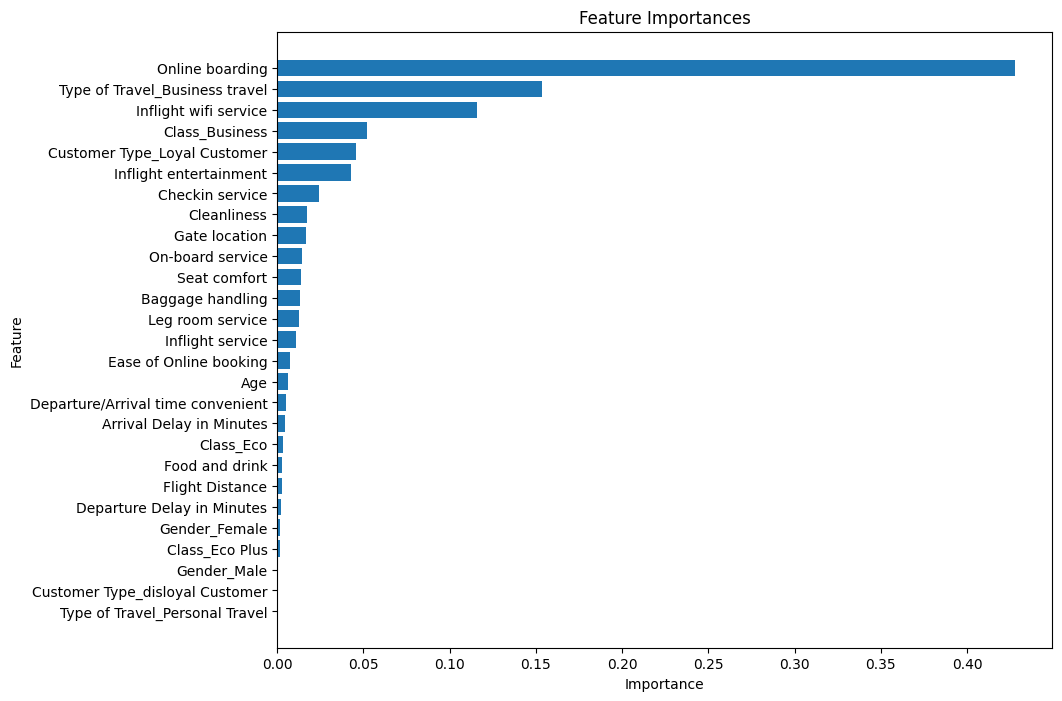

In [24]:
# Find feature importance
feature_importances = best_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print sorted feature importances
print("Sorted Feature Importances:")
for index, row in feature_importances_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

# plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()